In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import (accuracy_score, precision_score, recall_score, 
                             f1_score, roc_auc_score, roc_curve, silhouette_score,
                             classification_report, confusion_matrix)
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')


In [15]:

# 1. Data Loading & Preprocessing

# Load the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv"
df = pd.read_csv(url)

df.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Channel           440 non-null    int64
 1   Region            440 non-null    int64
 2   Fresh             440 non-null    int64
 3   Milk              440 non-null    int64
 4   Grocery           440 non-null    int64
 5   Frozen            440 non-null    int64
 6   Detergents_Paper  440 non-null    int64
 7   Delicassen        440 non-null    int64
dtypes: int64(8)
memory usage: 27.6 KB


In [17]:
df.describe()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [18]:
df['Channel'].value_counts()

Channel
1    298
2    142
Name: count, dtype: int64

In [19]:
# Separate features and target
X = df.drop('Channel', axis=1)
y = df['Channel']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeatures after standardization:")
pd.DataFrame(X_scaled, columns=X.columns).describe()


Features after standardization:


,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,4.400000e+02,4.400000e+02,440.000000,4.400000e+02,4.400000e+02,4.400000e+02,4.400000e+02
mean,3.552714e-16,-3.431598e-17,0.000000,-4.037175e-17,3.633457e-17,2.422305e-17,-8.074349e-18
std,1.001138e+00,1.001138e+00,1.001138,1.001138e+00,1.001138e+00,1.001138e+00,1.001138e+00
min,-1.995342e+00,-9.496831e-01,-0.778795,-8.373344e-01,-6.283430e-01,-6.044165e-01,-5.402644e-01
25%,-7.023369e-01,-7.023339e-01,-0.578306,-6.108364e-01,-4.804306e-01,-5.511349e-01,-3.964005e-01
50%,5.906683e-01,-2.767602e-01,-0.294258,-3.366684e-01,-3.188045e-01,-4.336004e-01,-1.985766e-01
75%,5.906683e-01,3.905226e-01,0.189092,2.849105e-01,9.946441e-02,2.184822e-01,1.048598e-01
max,5.906683e-01,7.927738e+00,9.183650,8.936528e+00,1.191900e+01,7.967672e+00,1.647845e+01


In [20]:

# 2. Ensemble Methods

# Split data for CV
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Random Forest
rf_50 = RandomForestClassifier(n_estimators=50, random_state=42)
rf_200 = RandomForestClassifier(n_estimators=200, random_state=42)

rf_50_scores = cross_val_score(rf_50, X_train, y_train, cv=5, scoring='accuracy')
rf_200_scores = cross_val_score(rf_200, X_train, y_train, cv=5, scoring='accuracy')

# Gradient Boosting
gb_50 = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, random_state=42)
gb_200 = GradientBoostingClassifier(n_estimators=200, learning_rate=0.1, random_state=42)

gb_50_scores = cross_val_score(gb_50, X_train, y_train, cv=5, scoring='accuracy')
gb_200_scores = cross_val_score(gb_200, X_train, y_train, cv=5, scoring='accuracy')

# Create results table
ensemble_results = pd.DataFrame({
    'Model': ['Random Forest (50)', 'Random Forest (200)', 
              'Gradient Boosting (50)', 'Gradient Boosting (200)'],
    'Mean CV Accuracy': [rf_50_scores.mean(), rf_200_scores.mean(),
                        gb_50_scores.mean(), gb_200_scores.mean()],
    'Std CV Accuracy': [rf_50_scores.std(), rf_200_scores.std(),
                       gb_50_scores.std(), gb_200_scores.std()]
})

print("Ensemble Methods - 5-fold CV Results:")
print(ensemble_results)

Ensemble Methods - 5-fold CV Results:
                     Model  Mean CV Accuracy  Std CV Accuracy
0       Random Forest (50)          0.922263         0.032671
1      Random Forest (200)          0.915706         0.031238
2   Gradient Boosting (50)          0.912533         0.038788
3  Gradient Boosting (200)          0.915706         0.032861


In [21]:
# 3. Support Vector Machine

# SVM with different kernels and C values
svm_linear_01 = SVC(kernel='linear', C=0.1, random_state=42, probability=True)
svm_linear_10 = SVC(kernel='linear', C=1.0, random_state=42, probability=True)
svm_rbf_01 = SVC(kernel='rbf', C=0.1, random_state=42, probability=True)
svm_rbf_10 = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)

svm_models = {
    'Linear C=0.1': svm_linear_01,
    'Linear C=1.0': svm_linear_10,
    'RBF C=0.1': svm_rbf_01,
    'RBF C=1.0': svm_rbf_10
}

svm_results = []
for name, model in svm_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    svm_results.append({
        'Model': name,
        'Mean CV Accuracy': scores.mean(),
        'Std CV Accuracy': scores.std()
    })

svm_results_df = pd.DataFrame(svm_results)
print("SVM - 5-fold CV Results:")
print(svm_results_df)
print("\n" + "-"*30)

SVM - 5-fold CV Results:
          Model  Mean CV Accuracy  Std CV Accuracy
0  Linear C=0.1          0.912322         0.022109
1  Linear C=1.0          0.922052         0.019002
2     RBF C=0.1          0.870175         0.049020
3     RBF C=1.0          0.909043         0.037918

------------------------------


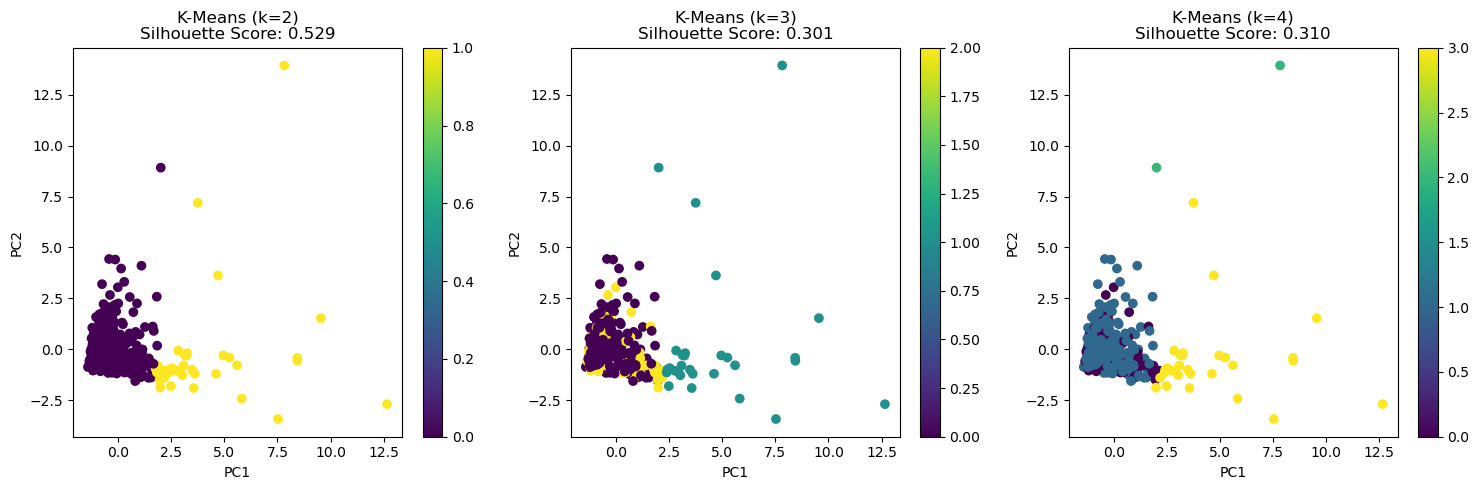

K-Means Silhouette Scores:
k=2: Silhouette Score = 0.529
k=3: Silhouette Score = 0.301
k=4: Silhouette Score = 0.310

Best k: 2


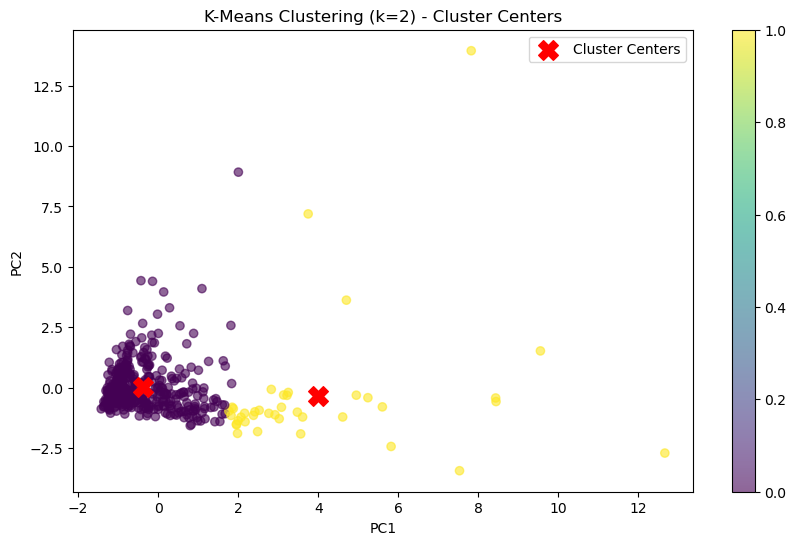

In [22]:

# 4. Clustering
# K-Means Clustering
k_values = [2, 3, 4]
kmeans_silhouette_scores = []

plt.figure(figsize=(15, 5))

for i, k in enumerate(k_values, 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    cluster_labels = kmeans.fit_predict(X_scaled)
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    kmeans_silhouette_scores.append(silhouette_avg)
    
    # PCA for visualization
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X_scaled)
    
    plt.subplot(1, 3, i)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap='viridis')
    plt.colorbar(scatter)
    plt.title(f'K-Means (k={k})\nSilhouette Score: {silhouette_avg:.3f}')
    plt.xlabel('PC1')
    plt.ylabel('PC2')

plt.tight_layout()
plt.show()

print("K-Means Silhouette Scores:")
for k, score in zip(k_values, kmeans_silhouette_scores):
    print(f"k={k}: Silhouette Score = {score:.3f}")

# Find best k
best_k = k_values[np.argmax(kmeans_silhouette_scores)]
print(f"\nBest k: {best_k}")

# Plot cluster centers for best k
kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
kmeans_best.fit(X_scaled)

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
centers_pca = pca.transform(kmeans_best.cluster_centers_)

plt.figure(figsize=(10, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans_best.labels_, cmap='viridis', alpha=0.6)
plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', marker='X', s=200, label='Cluster Centers')
plt.colorbar(scatter)
plt.title(f'K-Means Clustering (k={best_k}) - Cluster Centers')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()

In [23]:

# DBSCAN
print("\nDBSCAN Results:")
eps_values = [0.5, 1.0]
dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=5)
    dbscan_labels = dbscan.fit_predict(X_scaled)
    
    n_clusters = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
    n_noise = list(dbscan_labels).count(-1)
    
    # Calculate silhouette score (excluding noise points)
    if n_clusters > 1:
        # Filter out noise points for silhouette score calculation
        non_noise_mask = dbscan_labels != -1
        if sum(non_noise_mask) > 0:  # Ensure there are non-noise points
            silhouette_avg = silhouette_score(X_scaled[non_noise_mask], dbscan_labels[non_noise_mask])
        else:
            silhouette_avg = -1
    else:
        silhouette_avg = -1
    
    dbscan_results.append({
        'eps': eps,
        'n_clusters': n_clusters,
        'n_noise': n_noise,
        'silhouette_score': silhouette_avg
    })
    
    print(f"eps={eps}: Clusters={n_clusters}, Noise points={n_noise}, Silhouette Score={silhouette_avg:.3f}")



DBSCAN Results:
eps=0.5: Clusters=8, Noise points=235, Silhouette Score=0.299
eps=1.0: Clusters=3, Noise points=75, Silhouette Score=0.210


In [24]:

# 5. Final Evaluation

# Identify best models from CV results
best_ensemble = ensemble_results.loc[ensemble_results['Mean CV Accuracy'].idxmax()]
best_svm = svm_results_df.loc[svm_results_df['Mean CV Accuracy'].idxmax()]

print(f"Best Ensemble: {best_ensemble['Model']} (CV Acc: {best_ensemble['Mean CV Accuracy']:.3f})")
print(f"Best SVM: {best_svm['Model']} (CV Acc: {best_svm['Mean CV Accuracy']:.3f})")

# Train best models
if 'Random Forest' in best_ensemble['Model']:
    n_est = 200 if '200' in best_ensemble['Model'] else 50
    best_ensemble_model = RandomForestClassifier(n_estimators=n_est, random_state=42)
else:
    n_est = 200 if '200' in best_ensemble['Model'] else 50
    best_ensemble_model = GradientBoostingClassifier(n_estimators=n_est, learning_rate=0.1, random_state=42)

# Determine best SVM parameters
if 'Linear' in best_svm['Model']:
    kernel_type = 'linear'
else:
    kernel_type = 'rbf'

if 'C=0.1' in best_svm['Model']:
    c_value = 0.1
else:
    c_value = 1.0

best_svm_model = SVC(kernel=kernel_type, C=c_value, random_state=42, probability=True)

# Train models
best_ensemble_model.fit(X_train, y_train)
best_svm_model.fit(X_train, y_train)

# Predictions
y_pred_ensemble = best_ensemble_model.predict(X_test)
y_pred_svm = best_svm_model.predict(X_test)

# Probabilities for ROC AUC
y_proba_ensemble = best_ensemble_model.predict_proba(X_test)[:, 1]
y_proba_svm = best_svm_model.predict_proba(X_test)[:, 1]

# Calculate metrics
def calculate_metrics(y_true, y_pred, y_proba, model_name):
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred, average='weighted'),
        'Recall': recall_score(y_true, y_pred, average='weighted'),
        'F1-Score': f1_score(y_true, y_pred, average='weighted'),
        'ROC AUC': roc_auc_score(y_true, y_proba)
    }

ensemble_metrics = calculate_metrics(y_test, y_pred_ensemble, y_proba_ensemble, best_ensemble['Model'])
svm_metrics = calculate_metrics(y_test, y_pred_svm, y_proba_svm, best_svm['Model'])

# Create results table
final_results = pd.DataFrame([ensemble_metrics, svm_metrics])
print("\nFinal Test Set Results:")
print(final_results.round(3))

Best Ensemble: Random Forest (50) (CV Acc: 0.922)
Best SVM: Linear C=1.0 (CV Acc: 0.922)

Final Test Set Results:
                Model  Accuracy  Precision  Recall  F1-Score  ROC AUC
0  Random Forest (50)     0.909      0.917   0.909     0.911    0.964
1        Linear C=1.0     0.917      0.920   0.917     0.918    0.966


In [25]:

# Plot ROC curves
plt.figure(figsize=(10, 8))
fpr_ensemble, tpr_ensemble, _ = roc_curve(y_test, y_proba_ensemble)
fpr_svm, tpr_svm, _ = roc_curve(y_test, y_proba_svm)

plt.plot(fpr_ensemble, tpr_ensemble, label=f'{best_ensemble["Model"]} (AUC = {roc_auc_score(y_test, y_proba_ensemble):.3f})', linewidth=2)
plt.plot(fpr_svm, tpr_svm, label=f'{best_svm["Model"]} (AUC = {roc_auc_score(y_test, y_proba_svm):.3f})', linewidth=2)
plt.plot([0, 1], [0, 1], 'k--', alpha=0.5)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Model Comparison')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Detailed classification reports
print("\n" + "=" * 50)
print("DETAILED CLASSIFICATION REPORTS")
print("=" * 50)

print(f"\nBest Ensemble Model ({best_ensemble['Model']}):")
print(classification_report(y_test, y_pred_ensemble))

print(f"\nBest SVM Model ({best_svm['Model']}):")
print(classification_report(y_test, y_pred_svm))

ValueError: y_true takes value in {1, 2} and pos_label is not specified: either make y_true take value in {0, 1} or {-1, 1} or pass pos_label explicitly.

<Figure size 1000x800 with 0 Axes>